# Lab 4
### by: Pratyush Singh (pks629) and George Doykan (gd7448)

### 1.1) 3D plot of label 1 and label 2

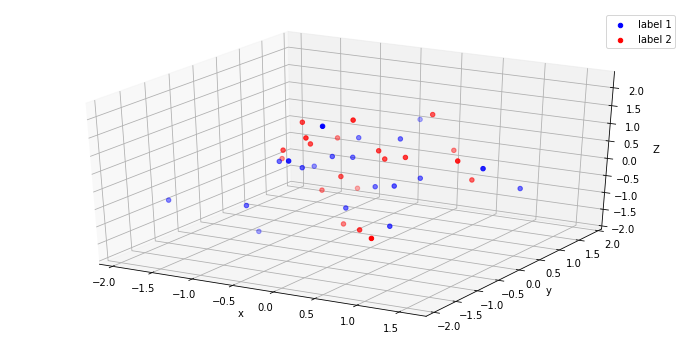

In [888]:
import numpy as np
import pandas as pd
import sympy as sym
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

mean1 = [0,0,0]
cov1 = [[0.5,0,0],[0,0.5,0],[0,0,0.7]]
label_1 = np.random.multivariate_normal(mean1, cov1, size = 20)

mean2 = [1,1,1]
cov2 = [[0.5,0,0],[0,0.5,0],[0,0,0.1]]
label_2 = np.random.multivariate_normal(mean1, cov1, size = 20)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(label_1[:, 0], label_1[:, 1], zs=label_1[:, 2], c='b', label="label 1")
ax.scatter(label_2[:, 0], label_2[:, 1], zs=label_2[:, 2], c='r', label = "label 2")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Z')
legend = ax.legend(loc = "upper right")
plt.show()

### 1.2 The points seem to be indistinguishable and show no real correlations

### 1.3 Build the Covariance Matrix
##### The matrix is square and symmetric so use C=X⊤X/(n−1)

In [892]:
a = np.array(label_1)
b = np.array(label_2)

X = np.concatenate( (a,b))

deviationX = X-(X/40)
deviationSum = np.dot(deviationX.T,deviationX)
covariance = deviationSum/40
print(covariance)
print("\n our calculation is close to the np.cov() calculation \n")
print(np.cov(X.T))

[[ 0.5434338   0.01309768  0.08578223]
 [ 0.01309768  0.544368   -0.02032416]
 [ 0.08578223 -0.02032416  0.72738144]]

 our calculation is close to the np.cov() calculation 

[[ 0.57156536 -0.00143869  0.12074945]
 [-0.00143869  0.57089217  0.0078333 ]
 [ 0.12074945  0.0078333   0.73088163]]


### 1.4) PCA on the data


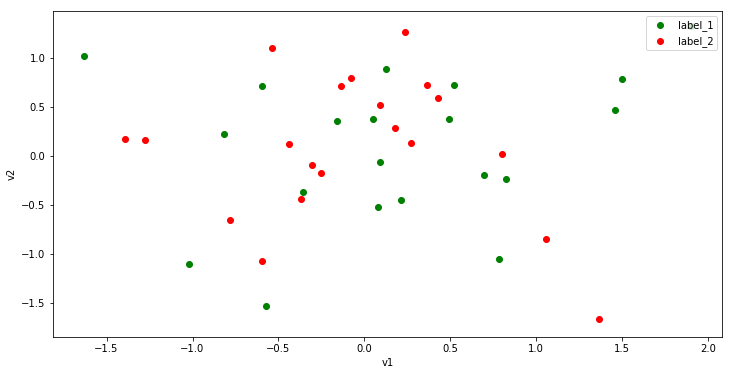

In [893]:
eig_values, eig_vectors = np.linalg.eig(covariance)

##PCA with dimension 2
##find the two largest eigenvectors
sorted_eigvals = np.sort(eig_values)
index_of_largest_eigvec = eig_values.tolist().index(sorted_eigvals[2])
index_of_second_largest_eigvec = eig_values.tolist().index(sorted_eigvals[1])

eig_1 = eig_vectors[index_of_largest_eigvec]
eig_2 = eig_vectors[index_of_second_largest_eigvec]

projected_label_1 = []
projected_label_2 = []

# get projections for label 1 
for i in range (0, 20):
    data = label_1[i,:]
    projected_data = [np.dot(data, eig_1), np.dot(data, eig_2)]
    projected_label_1.append(projected_data)
    
projected_label_1 = np.asarray(projected_label_1)


# get projections for label 2 
for i in range (0, 20):
    data = label_2[i,:]
    projected_data = [np.dot(data, eig_1), np.dot(data, eig_2)]
    projected_label_2.append(projected_data)
    
projected_label_2 = np.asarray(projected_label_2)

#plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(projected_label_1[:, 0], projected_label_1[:, 1],  
           c='g', label="label_1")
ax.scatter(projected_label_2[:, 0], projected_label_2[:, 1],  
           c='r', label="label_2")
ax.set_xlabel('v1')
ax.set_ylabel('v2')
legend = ax.legend(loc = "upper right")
plt.show()

/Users/pratyushsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


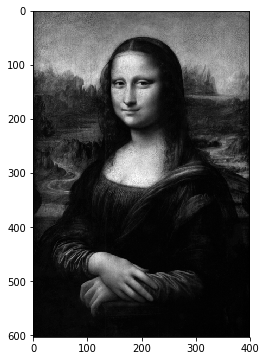

(603, 400)
k = 2


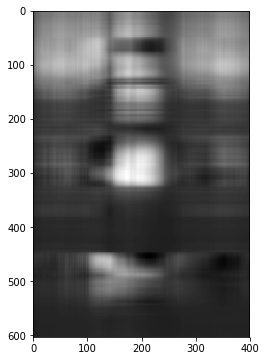

k = 5


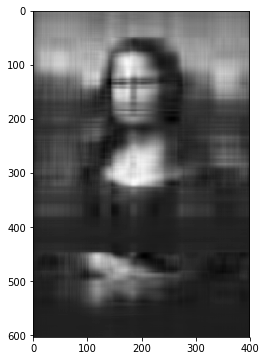

k = 10


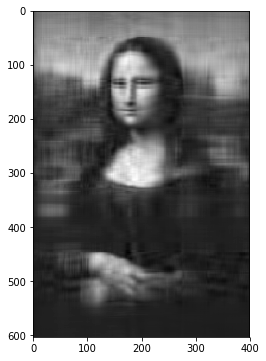

# bits in original image: 3859200
For k=2 rank approximation: 128512 bits
For k=5 rank approximation: 321280 bits
For k=10 rank approximation: 642560 bits


In [895]:
import scipy as sp
import numpy as np
from scipy import ndimage
from numpy import linalg
from scipy import linalg
import pylab as pl

imageData = sp.ndimage.imread("/Users/pratyushsingh/Downloads/mona_lisa.png", flatten=True)

##low rank approx functions
def lowRankApprox(u, s, v, k, data):
    D = sp.linalg.diagsvd(s, data.shape[0], data.shape[1])
    D0 = D.copy()
    D0[D0 < d[int(k)]] = 0.
    print ("k = " + str(k))
    X1 = np.dot(np.dot(u, D0), v)
    pl.imshow(X1)
    pl.show()

pl.gray()
pl.imshow(imageData)
pl.show()
print(imageData.shape)

##SVD
kArr = [2, 5, 10]
u,d,v= sp.linalg.svd(imageData, full_matrices=1)
D = sp.linalg.diagsvd(d, imageData.shape[0], imageData.shape[1])
##try rank k values of 2, 5, and 10
for k in kArr:    
    lowRankApprox(u,d,v,k,imageData)
    
    
#######part 2

def bit_count(u,d,v,k):
    return (k*len(u)+k*len(v)+k)*64

print("# bits in original image: " + str(imageData.shape[0]*imageData.shape[1]*16))
print("For k=2 rank approximation: %i bits" %bit_count(u,d,v,2))
print("For k=5 rank approximation: %i bits" %bit_count(u,d,v,5))
print("For k=10 rank approximation: %i bits" %bit_count(u,d,v,10))

### Problem 3

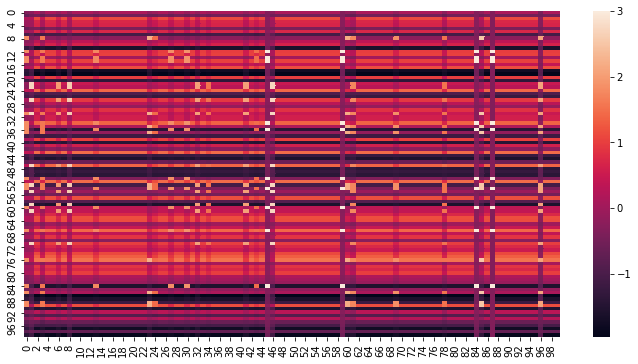

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]], dtype=bool)

In [419]:
#3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)


corr1 = pd.read_csv('CorrMat1.csv', sep=',', header=None)
corr3 = pd.read_table('CorrMat3.csv', sep=',', header=None)

corr1_std = StandardScaler().fit_transform(corr1) #normalizing the dataset
sbn.heatmap(corr1_std) #heat map of the dataset
plt.show()

#need to do PCA filter out outliers 
#can do eigendecomp. or svd
#in order to do eigendecom the matrix needs to be square and symmetric

corr1_std == corr1_std.T

from the matrix we can see that matrix corr1 is not symmetric, so we cannot use eigen-decomp. 
Lets use svd

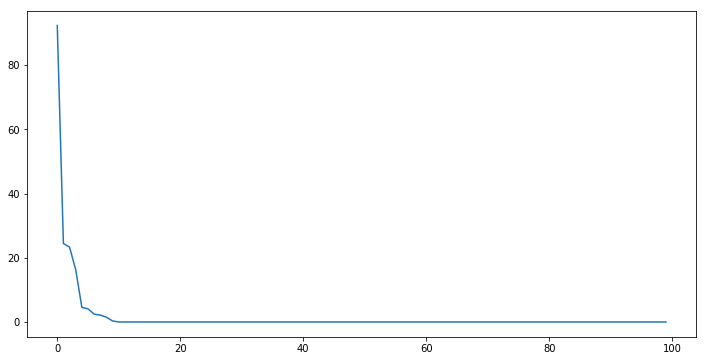

[  9.24224154e+01   2.44511972e+01   2.33329592e+01   1.62930274e+01
   4.55333003e+00   4.09214512e+00   2.44058850e+00   2.14667888e+00
   1.48455283e+00   3.15120129e-01   7.80003867e-14   6.04412210e-14
   4.93111202e-14   4.35182790e-14   3.20203053e-14   2.63989769e-14
   2.16316655e-14   1.82660905e-14   1.66095029e-14   1.43098545e-14
   1.23206684e-14   1.13697645e-14   1.00151292e-14   8.38114257e-15
   7.40761076e-15   6.91163635e-15   6.91163635e-15   6.91163635e-15
   6.91163635e-15   6.91163635e-15   6.91163635e-15   6.91163635e-15
   6.91163635e-15   6.91163635e-15   6.91163635e-15   6.91163635e-15
   6.91163635e-15   6.91163635e-15   6.91163635e-15   6.91163635e-15
   6.91163635e-15   6.91163635e-15   6.91163635e-15   6.91163635e-15
   6.91163635e-15   6.91163635e-15   6.91163635e-15   6.91163635e-15
   6.91163635e-15   6.91163635e-15   6.91163635e-15   6.91163635e-15
   6.91163635e-15   6.91163635e-15   6.91163635e-15   6.91163635e-15
   6.91163635e-15   6.91163635e-15

In [880]:
u,s,v = np.linalg.svd(corr1_std)
plt.plot(s) #looking at the singular values
plt.show()

print(s)

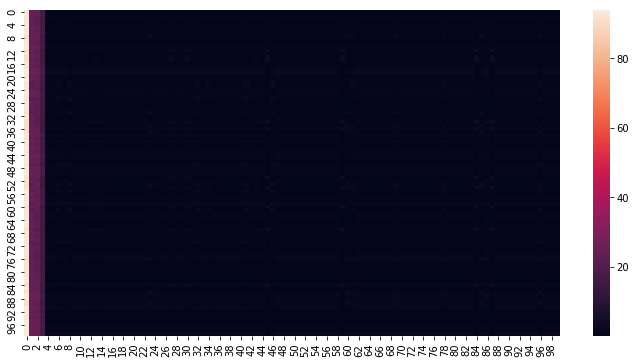

In [421]:
#From the singular matrix, we can see that only the first nine are really significant
def low_matrix_approx(u, s, v, k):
    approx_matrix = s[:k] #keep the top k
    approx_matrix = approx_matrix.tolist()
    for i in range(k, len(s)):
        approx_matrix.append(0)
    
    return approx_matrix

approximation_matrix = low_matrix_approx(u, s, v, 4)
approximation_matrix = np.array(approximation_matrix)

#subtract 
diff_1 = abs(corr1_std - approximation_matrix)
sbn.heatmap(diff_1)
plt.show()

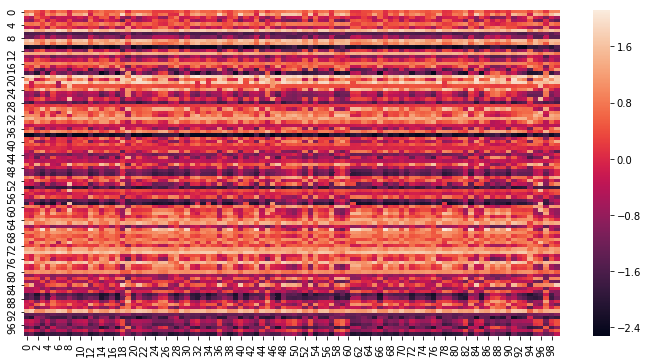

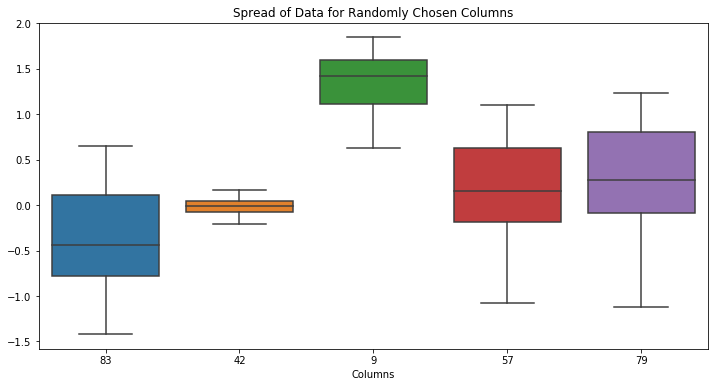

In [424]:
#Now let's look at corr3
corr3_std = StandardScaler().fit_transform(corr3) #corr3 standardized

sbn.heatmap(corr3_std)
plt.show()

#hard to see some of the outliers, pick 5 random columns to get a better idea
columns = np.random.choice(np.arange(0, 100), 5)
corr3_column_data = corr3_std[columns]

sbn.boxplot(data=corr3_column_data.T)
plt.xticks(np.arange(5), columns)
plt.xlabel("Columns")
plt.title("Spread of Data for Randomly Chosen Columns")
plt.show()

From the data exploration we can see that there is some skewness to the data, suggesting the possibility of outliers. Like before, we can do PCA two ways: **eigendecompisition** or **SVD**. In order to do eigendecomp. we need to make sure the matrix is square (which it is) and symmetric.

In [426]:
#check symmetry
print(corr3_std == corr3_std.T)

[[ True False False ..., False False False]
 [False  True False ..., False False False]
 [False False  True ..., False False False]
 ..., 
 [False False False ...,  True False False]
 [False False False ..., False  True False]
 [False False False ..., False False  True]]


From the output above, it can be seen that matrix is **NOT** square. Thus, we will proceed with SVD

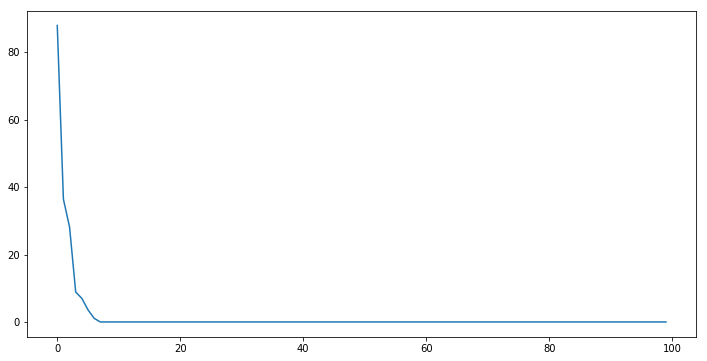

[  8.79596334e+01   3.64368737e+01   2.81707690e+01   8.87903926e+00
   6.99517729e+00   3.59465212e+00   1.08329934e+00   2.77927043e-14
   2.62120760e-14   2.32385112e-14   2.18097329e-14   1.50442884e-14
   1.45748587e-14   9.10097512e-15   8.75861875e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15   8.56462486e-15   8.56462486e-15
   8.56462486e-15   8.56462486e-15

In [881]:
u3,s3,v3 = np.linalg.svd(corr3_std)

#plotting the singular values
plt.plot(s3)
plt.show()

print(s3)

Looking at the values only the first 7 singular values are really significant

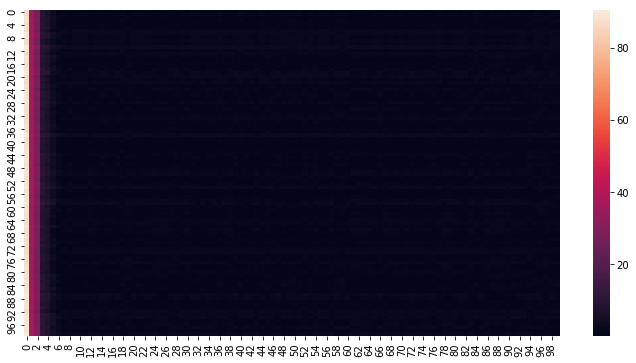

In [882]:
matrix_approx = low_matrix_approx(u3, s3, v3, 7)
diff3 = abs(corr3_std - matrix_approx)
sbn.heatmap(diff3)
plt.show()

#### 4.2) Lasso Regression Optimization using Cross-Validation

results: 


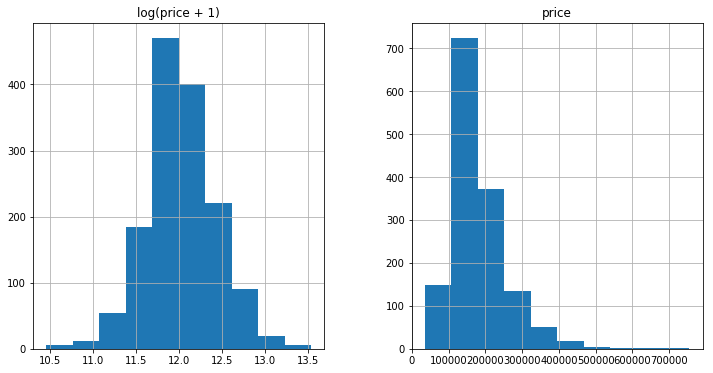

10.0 , rmse =  0.127337346687


In [912]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


train = pd.read_csv("Housing Data/train.csv")
test = pd.read_csv("Housing Data/test.csv")

print("results: ")
train.head()

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
        test.loc[:,'MSSubClass':'SaleCondition']))

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()
plt.show()

#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

#creating matrices for sklearn:
#Predictive models in sklearn receive feature observations for train, for evaluation (test) and labels for trainset
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

#ridge regression
model_ridge = Ridge(alpha=0.1).fit(X_train, y)
predict = np.expm1(model_ridge.predict(X_test))

results = pd.DataFrame({"Id":test.Id, "SalePrice":predict})
results.to_csv("results.csv", index = False)

###ridge regression optimization 

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from math import sqrt

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


alphas = [0.01, 0.1,2, 5,6,7,8,9,10, 15, 20,35,50]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(data=cv_ridge, index=alphas)
smallest = cv_ridge.min()
print((cv_ridge==smallest).argmax(), ", rmse = ", cv_ridge.min())



/Users/pratyushsingh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pratyushsingh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pratyushsingh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pratyushsingh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Converge

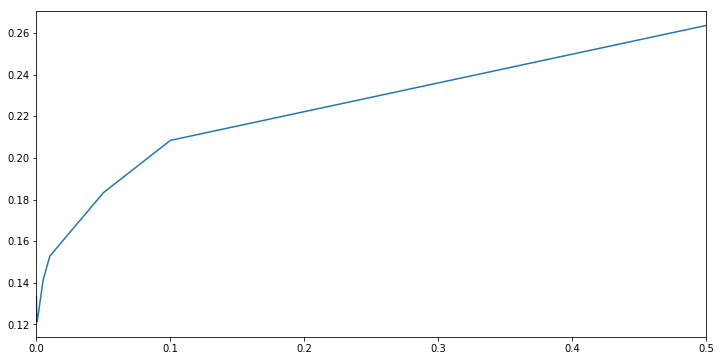

0.0005 , rmse =  0.121185350469


In [913]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from math import sqrt

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, 
                                   scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

def lasso_norm(model):
    model.fit(X_train, y)
    return(np.linalg.norm(model.coef_, 0))

#testing alpha values
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
cv_lasso = [rmse_cv(Lasso(alpha=alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(data=cv_lasso, index=alphas)
cv_lasso.plot()
plt.show()
smallest = cv_lasso.min()
print((cv_lasso==smallest).argmax(), ", rmse = ", cv_lasso.min())

/Users/pratyushsingh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.00000      3.0
0.10000      8.0
0.00100     79.0
0.00050    110.0
0.00010    192.0
0.00005    221.0
0.00001    258.0
dtype: float64


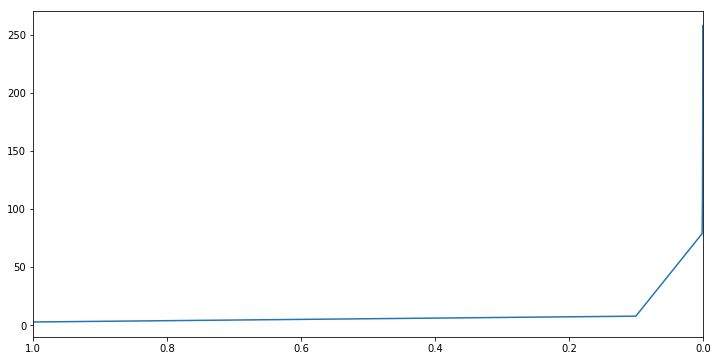

In [914]:
import pandas as pd

alphas = [1, 0.1, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
num_norms=[lasso_norm(Lasso(alpha=alpha)) for alpha in alphas]
l_norm = pd.Series(num_norms, index=alphas)
print(l_norm)
l_norm.plot()
plt.show()

### Ensemble 

In [915]:
#alpha=10 was found to be the optimal alpha previously
ridge_model = Ridge(alpha=10) 
ridge_model.fit(X_train, y)
ridge_predict = ridge_model.predict(X_train)
#Predicting for the test set so we can stack the prediction to the test set
ridge_predict2 = ridge_model.predict(X_test) 
X_ridge_stacked = X_train.copy()
X_ridge_stacked2 = X_test.copy()
X_ridge_stacked['Stacking'] = ridge_predict
X_ridge_stacked2['Stacking'] = ridge_predict2

stacked_ridge = Ridge(alpha=10)
stacked_ridge.fit(X_ridge_stacked, y)
ridge_stacked_pred = stacked_ridge.predict(X_ridge_stacked2)
ridge_stacked_pred = np.expm1(ridge_stacked_pred)

ridge_stacked_df = pd.DataFrame(test['Id'])
ridge_stacked_df[1] = np.array(ridge_stacked_pred)
ridge_stacked_df.columns=('Id', 'SalePrice')
ridge_stacked_df.to_csv('ridge_stacked.csv', index=False)

cv_stacked_ridge = rmse_cv(Ridge(alpha = 0.1)).mean()

##RMSE value of 0.12241 on Kaggle

#### RMSE value on kaggle for stacked  ridge regression was 0.12241 which is almost the exact same as normal ridge regression

#### Lasso Regression:

In [916]:
lasso_model = Lasso(alpha=0.0005)
lasso_model.fit(X_train, y)
lasso_predict_train = lasso_model.predict(X_train)
lasso_predict_test = lasso_model.predict(X_test)
X_lasso_stacked = X_train.copy()
X_lasso_stacked2 = X_test.copy()
X_lasso_stacked['Stacking'] = lasso_predict_train
X_lasso_stacked2['Stacking'] = lasso_predict_test

stacked_lasso = Lasso(alpha=0.0005)
stacked_lasso.fit(X_lasso_stacked, y)
lasso_stacked_pred = stacked_lasso.predict(X_lasso_stacked2)
lasso_stacked_pred = np.expm1(lasso_stacked_pred)

lasso_stacked_df = pd.DataFrame(test['Id'])
lasso_stacked_df[1] = np.array(lasso_stacked_pred)
lasso_stacked_df.columns=('Id', 'SalePrice')
lasso_stacked_df.to_csv('lasso_stacked.csv', index=False)

#RMSE value of 0.12117 on Kaggle

#### Score on Kaggle for stacked Lasso regression was 0.12217 which is almost the same as normal lasso regression

### Problem 4 Part 4

In [648]:
import xgboost
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

training = pd.read_csv('Housing Data/train.csv')
testing = pd.read_csv('Housing Data/test.csv')

all_data = pd.concat((training.loc[:,'MSSubClass':'SaleCondition'],
                      testing.loc[:,'MSSubClass':'SaleCondition']))

training['SalePrice'] = np.log1p(training['SalePrice'])

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = training[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness of each feature
skewed_feats = skewed_feats[skewed_feats > 0.75] #features with skew greater than a value of 0.75
skewed_feats = skewed_feats.index #get the index of these feautures in the training set
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.820503,4.196175,9.094915,6.089072,5.564577,1971.312778,1984.264474,2.095752,4.226403,0.681207,...,0.002741,0.081877,0.002398,0.865022,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,0.692436,0.320316,0.509882,1.409947,1.113131,30.291442,20.894344,2.614355,2.980814,1.878488,...,0.052289,0.274225,0.048920,0.341758,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.919854,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.196175,9.154193,6.000000,5.000000,1973.000000,1993.000000,0.000000,5.910797,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.369448,9.356257,7.000000,6.000000,2001.000000,2004.000000,5.102906,6.598509,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,8.638525,7.331060,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [571]:
#xgboost with no parameters
x_train = all_data[:training.shape[0]]
x_test = all_data[training.shape[0]:]
y = training.SalePrice

xgboost_model = xgboost.XGBRegressor()
xgboost_model.fit(x_train, y)
predictions = np.expm1(xgboost_model.predict(x_test))

solution = pd.DataFrame({"id":testing.Id, "SalePrice":predictions})
solution.to_csv("simple_xgboost_no_params.csv", index = False)

With zero params and tuning, the XGBoost model has a Kaggle score 0.13904

In [572]:
#xgboost with parameter tuning
x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size=0.33)
xgboost_model_params = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.05, verbose=True, max_depth=25)
xgboost_model_params.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=True)

[0]	validation_0-rmse:10.9402
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:10.3933
[2]	validation_0-rmse:9.87385
[3]	validation_0-rmse:9.38034
[4]	validation_0-rmse:8.91153
[5]	validation_0-rmse:8.46618
[6]	validation_0-rmse:8.04437
[7]	validation_0-rmse:7.64363
[8]	validation_0-rmse:7.26293
[9]	validation_0-rmse:6.90125
[10]	validation_0-rmse:6.55765
[11]	validation_0-rmse:6.23123
[12]	validation_0-rmse:5.92068
[13]	validation_0-rmse:5.6261
[14]	validation_0-rmse:5.34628
[15]	validation_0-rmse:5.07971
[16]	validation_0-rmse:4.82742
[17]	validation_0-rmse:4.58736
[18]	validation_0-rmse:4.35912
[19]	validation_0-rmse:4.1429
[20]	validation_0-rmse:3.93658
[21]	validation_0-rmse:3.74051
[22]	validation_0-rmse:3.55439
[23]	validation_0-rmse:3.37841
[24]	validation_0-rmse:3.21042
[25]	validation_0-rmse:3.05157
[26]	validation_0-rmse:2.90082
[27]	validation_0-rmse:2.75723
[28]	validation_0-rmse:2.62086
[29]	validation_0-rmse:2.49155
[30]	validation_0-

[252]	validation_0-rmse:0.135783
[253]	validation_0-rmse:0.135783
[254]	validation_0-rmse:0.135782
[255]	validation_0-rmse:0.135781
[256]	validation_0-rmse:0.13578
[257]	validation_0-rmse:0.135779
[258]	validation_0-rmse:0.135778
[259]	validation_0-rmse:0.135778
[260]	validation_0-rmse:0.135777
[261]	validation_0-rmse:0.135777
[262]	validation_0-rmse:0.135776
[263]	validation_0-rmse:0.135775
[264]	validation_0-rmse:0.135775
[265]	validation_0-rmse:0.135775
[266]	validation_0-rmse:0.135774
[267]	validation_0-rmse:0.135774
[268]	validation_0-rmse:0.135774
[269]	validation_0-rmse:0.135775
[270]	validation_0-rmse:0.135775
[271]	validation_0-rmse:0.135774
Stopping. Best iteration:
[266]	validation_0-rmse:0.135774



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=25, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=True)

In [574]:
#we found that the optimal number of iterations to be 266
#lets fit all of our data
x_train = all_data[:training.shape[0]]
x_test = all_data[training.shape[0]:]
y = training.SalePrice
xgboost_model_params = xgboost.XGBRegressor(n_estimators=266, learning_rate=0.05, verbose=True, max_depth=25)
xgboost_model_params.fit(x_train, y,verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=25, min_child_weight=1, missing=None, n_estimators=266,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=True)

In [575]:
predictions_xgboost_params = np.expm1(xgboost_model_params.predict(x_test))
solution = pd.DataFrame({"id":testing.Id, "SalePrice":predictions_xgboost_params})
solution.to_csv("parameters_xgboost.csv", index = False)

This set of parameters was significantly better than the xgboost with no params; however, xgboost is still overfitting with ascore of 0.13880

There are 288 features, let's see if we can do PCA to reduce the number of features

In [491]:
def rmse_cv(model, x_train, y):
    rmse = np.sqrt(-cross_val_score(model, x_train, y, scoring="neg_mean_squared_error", cv = 10))
    
    return rmse

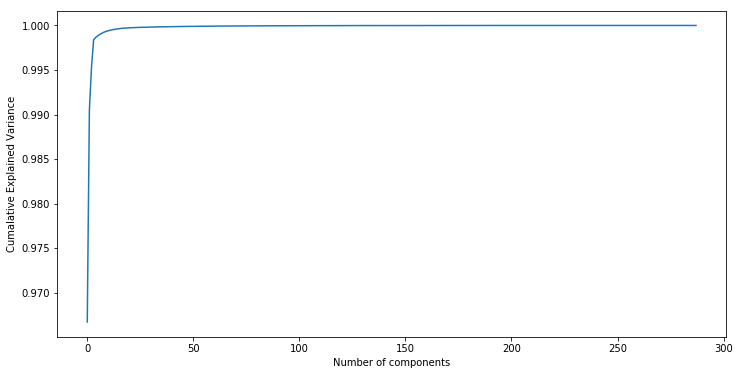

[ 0.96675375  0.99053323  0.99531426  0.99838437  0.99866987  0.99885521
  0.99901092  0.99913658  0.9992582   0.99934336  0.99941433  0.9994756
  0.99952873  0.99956821  0.99960649  0.99964274  0.99967424  0.99969421
  0.99971351  0.99972737  0.99973957  0.99975051  0.99976123  0.99977125
  0.99978038  0.99978892  0.99979653  0.99980338  0.99980994  0.99981593]


In [553]:
#let's try to find bias or outlier features
from sklearn.decomposition import PCA
pca = PCA()
transformed_data = pca.fit(all_data[:training.shape[0]])

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Cumalative Explained Variance")
plt.show()

print(cum_explained_variance[:30])

Eyeballing it, we can see that the first thirty components make up around 0.9998 of the cumalative variance 

(1459, 30)


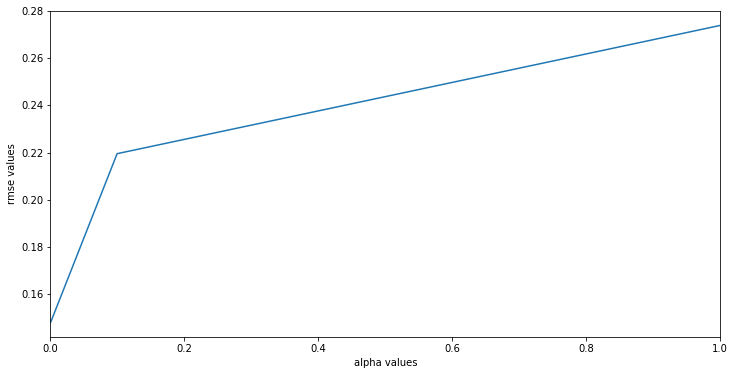

0.148004327047
0.0005


In [814]:
x_train = all_data[:training.shape[0]]
x_test = all_data[training.shape[0]:]
y = training.SalePrice

pca = PCA(n_components=30)
transformed_training_data = pca.fit_transform(x_train)
transformed_test_data = pca.fit_transform(x_test)

print(transformed_test_data.shape)

#lets fit using lasso regression
alphas = [0.0005, 0.001, 0.1, 1]
cv_lasso = [rmse_cv(Lasso(alpha = alpha), x_train=transformed_training_data, y=y).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

cv_lasso.plot()
plt.xlabel("alpha values")
plt.ylabel("rmse values")
plt.show()

print(cv_lasso.min())

optimal_alpha = np.argmin(cv_lasso == cv_lasso.min)
print(optimal_alpha)

In [536]:
lassos_model = Lasso(alpha=optimal_alpha).fit(transformed_training_data, y)
prediction = np.expm1(lassos_model.predict(transformed_test_data))
solution = pd.DataFrame({"id":testing.Id, "SalePrice":prediction})
solution.to_csv("pca_lassos_solution.csv", index = False)

Using PCA, we did not see any improvement. We got a score of 0.42219.

#### After trying approaches, we decided to use a Kaggle kernel as the basis of our model

In [600]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
color = sbn.color_palette()
from scipy import stats
from scipy.stats import norm, skew 

training = pd.read_csv('Housing Data/train.csv')
testing = pd.read_csv('Housing Data/test.csv')

train_id = training['Id']
test_id = testing['Id']

training.drop("Id", axis = 1, inplace = True) #dropping id column because it is not neccesary 
testing.drop("Id", axis = 1, inplace = True)

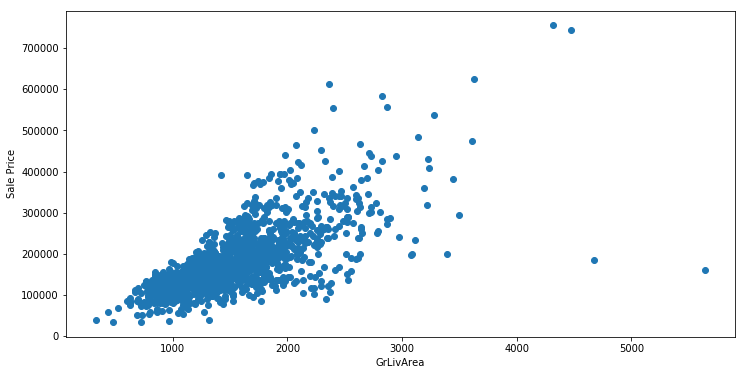

In [601]:
#exploring the outliers
fig, ax = plt.subplots()
ax.scatter(x=training['GrLivArea'], y=training.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')

There are outliers in the bottom right, so let's remove them

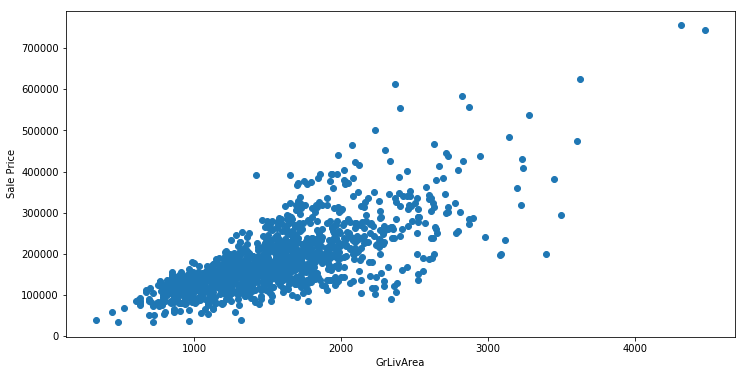

In [602]:
fig, ax = plt.subplots()
training = training.drop(training[(training.GrLivArea > 4000) & (training.SalePrice < 300000)].index)
ax.scatter(x=training.GrLivArea, y=training.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')

Next we normalize the target variable. *Although we have done this above many times, I really liked the Kernel's approach to visualizing the data*  

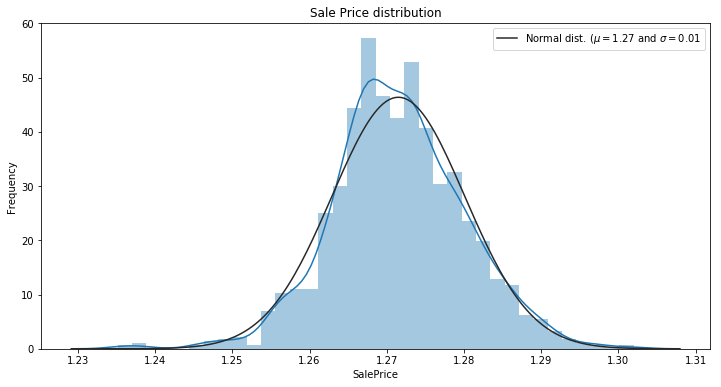

In [614]:
sbn.distplot(training['SalePrice'], fit=norm)
mu, sigma = norm.fit(training.SalePrice) #fitted mean and sigma

plt.legend(['Normal dist. ($\mu=$' + str(mu.round(2)) + ' and $\sigma=$' + str(sigma.round(2))])
plt.title('Sale Price distribution')
plt.ylabel('Frequency')

From the blue line, our original plot we can see that the data is right-skewed. In order to confirm this we can use a QQ-plot. The 'Qs' in "QQ-Plot" mean quantiles, and a quantile is a slice of the data such that each quantile represents the same amount of data. A QQ-Plot compares the distribution of your data to the distribution of some theoretical distribution. Basically, it tries to answer the question, **"how similar are the data's quantiles to the quantiles the data would have if it followed some distribution"**. Common distributions to be compared against are Gaussian and exponential distributions 

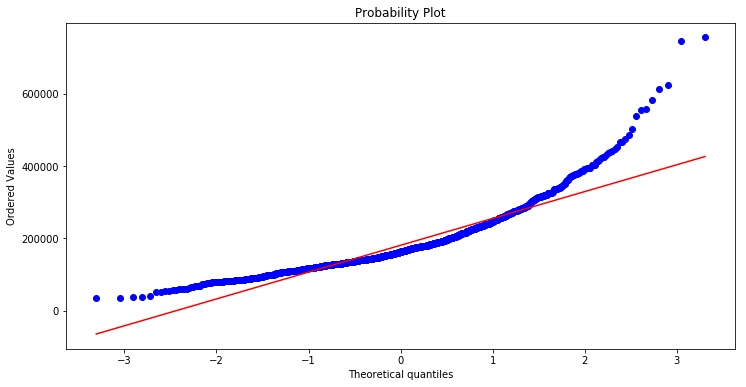

In [616]:
fig = plt.figure()
res = stats.probplot(train.SalePrice, plot=plt)
plt.show()

If the data is skewed, the QQ-Plot shows us this. From the image below (doing a Google search), it can be seen that the concave shape of our data indicates a right skew.

QQ-Plot Interpretation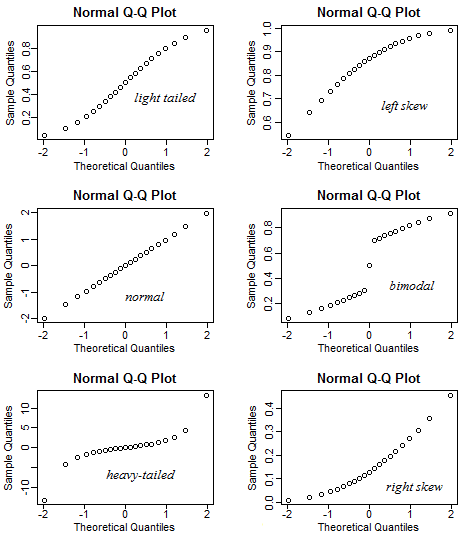

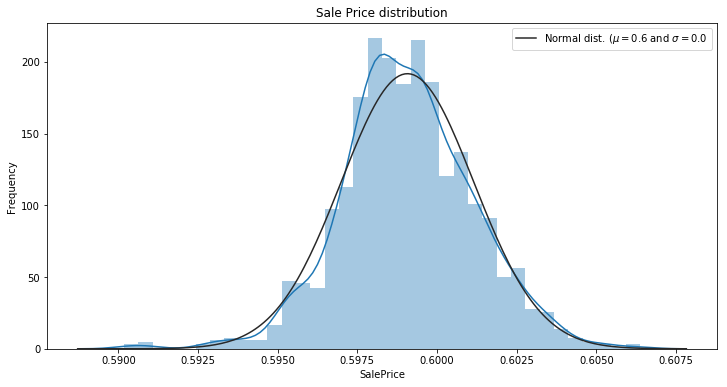

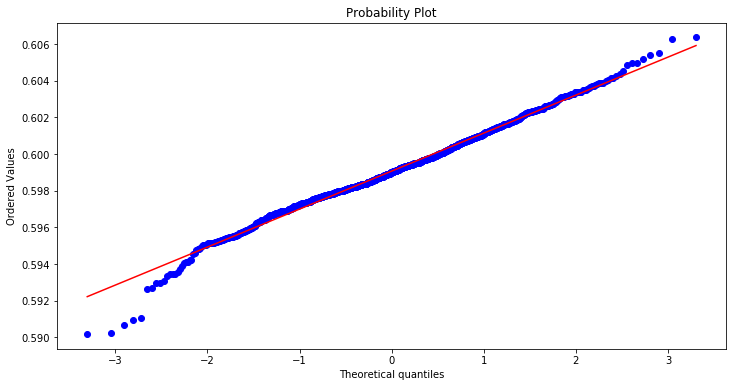

In [626]:
#normalize SalesPrice
training['SalePrice'] = np.log1p(training['SalePrice'])

#replot
sbn.distplot(training['SalePrice'], fit=norm)
mu, sigma = norm.fit(training.SalePrice) #fitted mean and sigma

plt.legend(['Normal dist. ($\mu=$' + str(mu.round(2)) + ' and $\sigma=$' + str(sigma.round(2))])
plt.title('Sale Price distribution')
plt.ylabel('Frequency')

fig = plt.figure()
res = stats.probplot(training.SalePrice, plot=plt)

Much more normally distributed after the transformation. Now we do feature engineering, and try to assign missing values that make sense given to that feature.

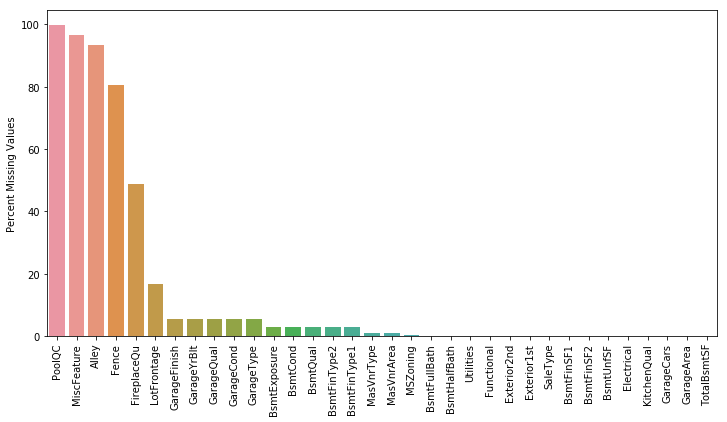

In [778]:
all_data_ = pd.concat((training.loc[:,'MSSubClass':'SaleCondition'],
                      testing.loc[:,'MSSubClass':'SaleCondition']))

missing_values_ratio = (all_data_.isnull().sum())/len(all_data_) * 100
missing_values_ratio = missing_values_ratio.drop(missing_values_ratio[missing_values_ratio == 0].index)
missing_values_ratio = missing_values_ratio.sort_values(ascending=False)

plt.xticks(rotation='90')
plt.ylabel('Percent Missing Values')
sbn.barplot(x=missing_values_ratio.index, y=missing_values_ratio)

missing_values_ratio = pd.DataFrame({'Missing Ratio': missing_values_ratio})


Now, we proceed to fill the missing values with the most appropriate label. In some cases where there is only one missing value we fill it with the mode of the column or simply just remove it. In other cases, we fill it with zeroes or replace it with 'None'.

In [779]:
col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 
       'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

all_data_[col] = all_data_[col].fillna('None')

These columns were filled with *None* because the description of the values stated that *NA* meant *No _* (i.e. *No Pool*)

The missing values in *LotFrontage* feature can be filled with the average of the *LotFrontage* of the houses in the same neighborhood. This makes sense because houses in the same neighborhood would probably have the same *LotFrontage* area. 

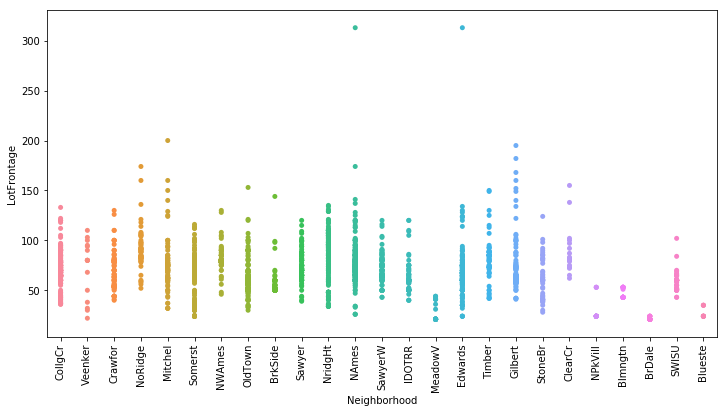

In [780]:
#Group LotFrontage by Neighborhood
plt.xticks(rotation='90')
sbn.stripplot(x=all_data_['Neighborhood'], y=all_data_['LotFrontage'])

From the Strip Plot above, there are some outliers in the LotFrontage area for each neighborhood, so we are going to use the median to fill the missing values instead of the mean. 

In [781]:
all_data_["LotFrontage"] = all_data_.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [782]:
col = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
       'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
all_data_[col] = all_data_[col].fillna('0') #filling with zero since there are missing values for these would mean 0


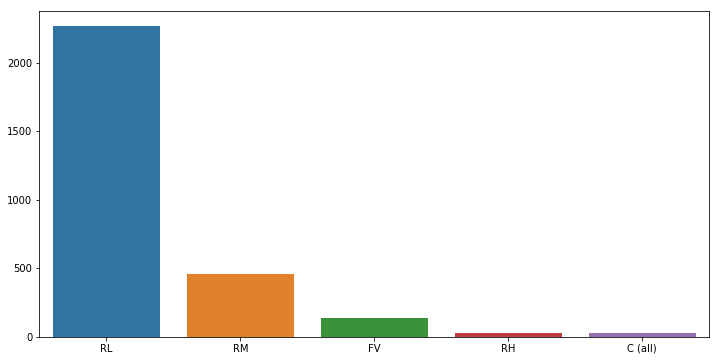

In [783]:
freq_ = all_data_['MSZoning'].value_counts()
sbn.barplot(x=freq_.index, y=freq_.values)

The RL is the most common, so we will fill the missing values with RL

In [784]:
#finishing the missing value feature engineering 
all_data_['MSZoning'] = all_data_['MSZoning'].fillna(all_data_['MSZoning'].mode()[0])
all_data_["Functional"] = all_data_["Functional"].fillna("Typ") #data description
all_data_['Electrical'] = all_data_['Electrical'].fillna(all_data_['Electrical'].mode()[0])
all_data_['KitchenQual'] = all_data_['KitchenQual'].fillna(all_data_['KitchenQual'].mode()[0])
all_data_['Exterior1st'] = all_data_['Exterior1st'].fillna(all_data_['Exterior1st'].mode()[0])
all_data_['Exterior2nd'] = all_data_['Exterior2nd'].fillna(all_data_['Exterior2nd'].mode()[0])
all_data_['SaleType'] = all_data_['SaleType'].fillna(all_data_['SaleType'].mode()[0])
all_data_['MSSubClass'] = all_data_['MSSubClass'].fillna("None")
all_data_ = all_data_.drop(['Utilities'], axis=1)

#we can see that there are no more missing values
missing_values_ratio = (all_data_.isnull().sum())/len(all_data_) * 100
missing_values_ratio = missing_values_ratio.drop(missing_values_ratio[missing_values_ratio == 0].index)
missing_values_ratio = missing_values_ratio.sort_values(ascending=False)
print(missing_values_ratio.size)

0


There are some *numerical* values are actually *categorial*, so we will turn them into strings. These features are MSSubClass, OverallCond, YrSold, MoSold

In [785]:
all_data_['MSSubClass'] = all_data_['MSSubClass'].apply(str)
all_data_['OverallCond'] = all_data_['OverallCond'].astype(str)
all_data_['YrSold'] = all_data_['YrSold'].astype(str)
all_data_['MoSold'] = all_data_['MoSold'].astype(str)

Furthemore, there are some features that contain inherent order in them. For example features like *FirePlaceQu*, the higher the number the more *valuable* it is. We will now encode this order using LabelEncoder 

In [787]:
from sklearn.preprocessing import LabelEncoder

cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

for c in cols:
    label_encoder_ = LabelEncoder() 
    label_encoder_.fit(list(all_data_[c].values)) 
    all_data_[c] = label_encoder_.transform(list(all_data_[c].values))

We will now compute the numeric skewness of each feature, and then normalize the skewed features

In [805]:
numeric_features = all_data_.dtypes[all_data_.dtypes != "object"].index
skewed_features = all_data_[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features.sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' : skewed_features})

print(skewness.head())

                   Skew
MiscVal       21.947195
PoolArea      16.898328
LotArea       12.822431
LowQualFinSF  12.088761
3SsnPorch     11.376065


We will now perform Box Cox transformation to fix the skewness of features

In [806]:
from scipy.special import boxcox1p

skewed_features = skewed_features.index
lam = 0.15
all_data_[skewed_features] = boxcox1p(all_data_[skewed_features], lam)

In [838]:
all_data_ = pd.get_dummies(all_data_) #turning categorical variables into numbers

training_data = all_data_[:training.shape[0]]
testing_data = all_data_[training.shape[0]:]
y_train = training.SalePrice.values

Now we will stack different models. In order to do this, will create a stacking model class that will stack these different models to make one model. Using these stacked models we will create more stacked models on top.

The hyper-params for the different models were taken directly from the kaggle kernel. In the future, further investigation is required to see the effect of each parameter on the overall result

In [848]:
#perform stacking
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


#the alpha is 0.0005 which was calc. from earlier
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state = 7)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

The first class here is called *AveragingModels* because it takes the predictions of each model and averages them together. 

In [917]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [872]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [918]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso, model_xgb))


Now we aim to stack these averaged models and introduce the concept of *meta models*. In this step, we split the training data into **training** and **holdout**. We train the model on the training portion, and then test it on the holdout. Next, we use the results from the predictions out of the **holdout step** and the correct answers to train the *meta model*. We currently have the n-folds set to 5, so we split the data into 5 portions and train on the first 4 before testing it on the fifth one. Then we use the results from this to train the meta model 

In [919]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=6):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
    
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [920]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
stacked_averaged_models.fit(training_data.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(training_data.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(testing_data.values))
#print(rmsle(y_train, stacked_train_pred))

In [921]:
model_xgb.fit(training_data, y_train, verbose=True)
xgb_train_pred = model_xgb.predict(training_data)
xgb_pred = np.expm1(model_xgb.predict(testing_data))

In [922]:
model_lgb.fit(training_data, y_train)
lgb_train_pred = model_lgb.predict(training_data)
lgb_pred = np.expm1(model_lgb.predict(testing_data.values))

In [923]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
sub = pd.DataFrame()
sub['Id'] = testing.Id
sub['SalePrice'] = ensemble
sub.to_csv('ensemble_final_submission-1.csv',index=False)

Screenshot of Kaggle Result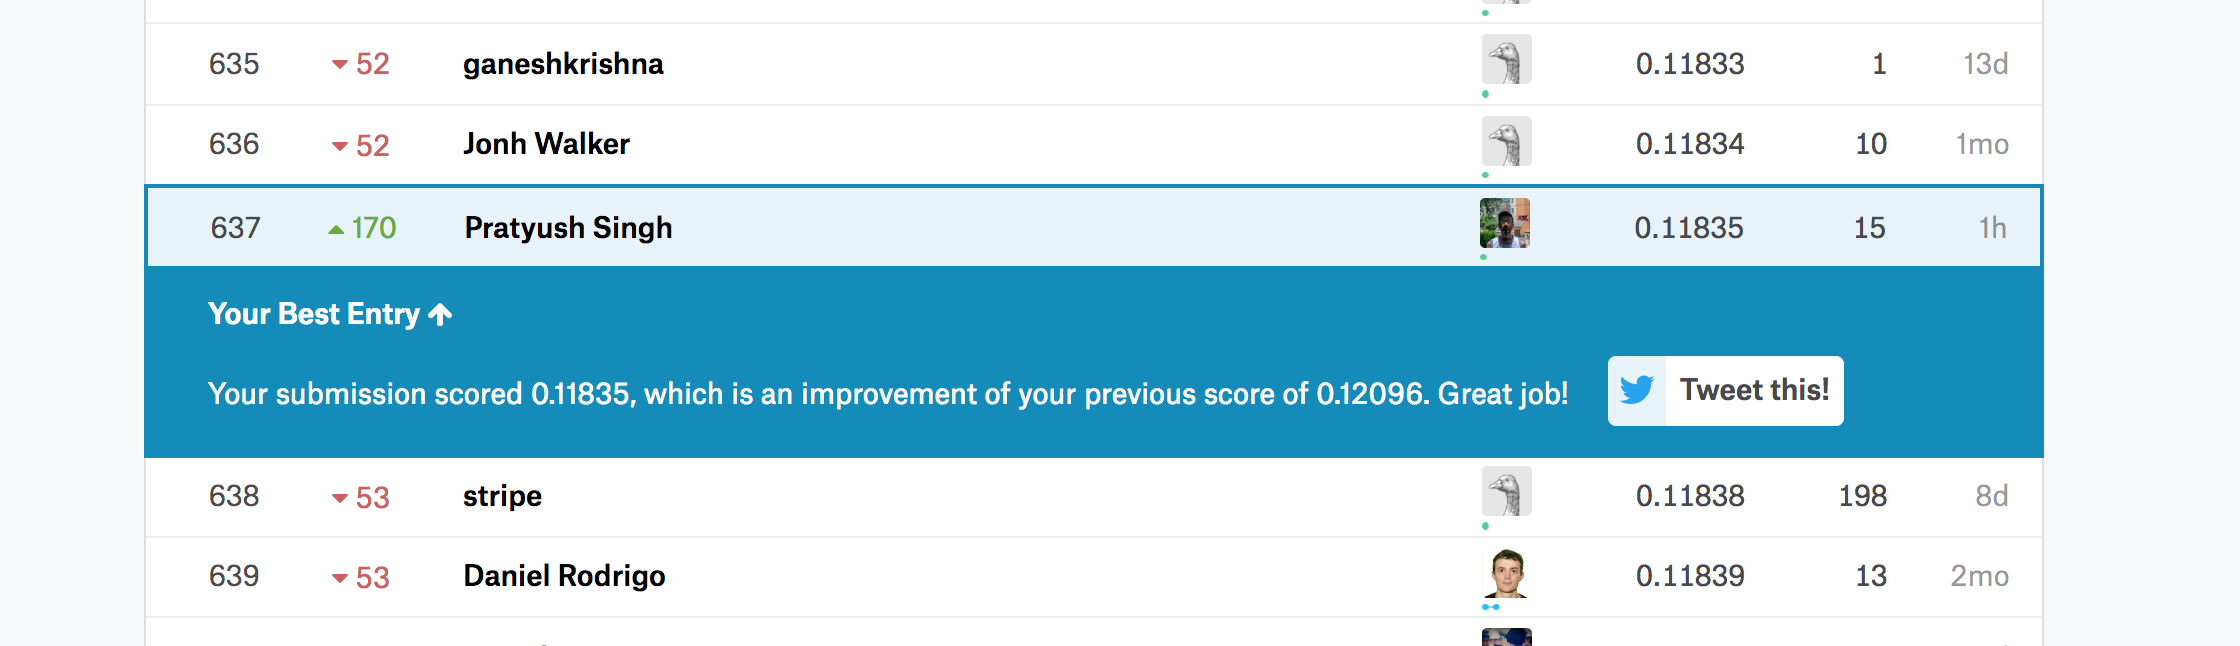

It can be seen that through these stacking and ensembling methods our rank improved

**Kaggle competition reference**
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard